In [29]:
#Reading Data
import json
import numpy as np
import pandas as pd   
ice = pd.read_json('train.json')
test = pd.read_json('test.json')

In [30]:
ice.inc_angle = ice.inc_angle.replace('na', 0)
ice.inc_angle = ice.inc_angle.astype(float).fillna(0.0)

In [31]:
band1 = []
band2 = []

for i in range(1604):
    band1.append(np.reshape(ice.iloc[i,0],(75,75)))
    band2.append(np.reshape(ice.iloc[i,1],(75,75)))



In [32]:
test_band1 = []
test_band2 = []

for i in range(8424):
    test_band1.append(np.reshape(test.iloc[i,0],(75,75)))
    test_band2.append(np.reshape(test.iloc[i,1],(75,75)))

In [33]:

band1 = np.array(band1,dtype='f')
band2 = np.array(band2,dtype='f')
test_band1 = np.array(test_band1,dtype='f')
test_band2 = np.array(test_band2,dtype='f')

In [34]:
#Average of both bands
new_band = []
for i in range(1604):
    new_band.append((band1[i] +band2[i]))
new_band = np.array(new_band,dtype='f')
new_band.shape

(1604, 75, 75)

In [35]:
test_new_band=[]
for i in range(8424):
    test_new_band.append((test_band1[i] + test_band2[i])/2)
test_new_band = np.array(test_new_band,dtype='f')
test_new_band.shape

(8424, 75, 75)

In [36]:
#Changing Sign

for i in range(1604):
    new_band[i] = np.negative(new_band[i])
    band1[i] = np.negative(band1[i])
    band2[i] = np.negative(band2[i])
for i in range(8424):
    test_new_band[i] = np.negative(test_new_band[i])
    test_band1[i] = np.negative(test_band1[i])
    test_band2[i] = np.negative(test_band2[i])

In [37]:
#Subtracting each column of each pixel by the max value
for i in range(1604):
    for j in range(75):
        new_band[i][j] = np.max(new_band[i][j]) - new_band[i][j]
        band1[i][j] = np.max(band1[i][j]) - band1[i][j]
        band2[i][j] = np.max(band2[i][j]) - band2[i][j]
for i in range(8424):
    for j in range(75):
        test_new_band[i][j] = np.max(test_new_band[i][j]) - test_new_band[i][j]
        test_band1[i][j] = np.max(test_band1[i][j]) - test_band1[i][j]
        test_band2[i][j] = np.max(test_band2[i][j]) - test_band2[i][j]

In [38]:
from sklearn.preprocessing import normalize
for i in range(1604):
    new_band[i] = normalize(new_band[i], axis=1, norm='l1')
    band1[i] = normalize(band1[i],axis=1,norm='l1')
    band2[i] = normalize(band2[i],axis=1,norm='l1')
for i in range(1604):
    test_new_band[i] = normalize(test_new_band[i], axis=1, norm='l2')
    test_band1[i] = normalize(test_band1[i], axis=1, norm='l2')
    test_band2[i] = normalize(test_band2[i], axis=1, norm='l2')

In [39]:
#Using median Blur Gives better log loss value
import cv2
median1=[]
median2=[]
median3=[]
for i in range(1604):
    median3.append(cv2.medianBlur(new_band[i],5))
    median2.append(cv2.medianBlur(band2[i],5))
    median1.append(cv2.medianBlur(band1[i],5))
median3

[array([[ 0.01492024,  0.01253546,  0.01241447, ...,  0.01759495,
          0.01549814,  0.01549173],
        [ 0.01646326,  0.01363369,  0.01241447, ...,  0.01549814,
          0.01549173,  0.01549173],
        [ 0.01646326,  0.01492024,  0.01267799, ...,  0.01589071,
          0.01549814,  0.01549173],
        ..., 
        [ 0.01419193,  0.01419193,  0.01361132, ...,  0.01641794,
          0.01641794,  0.01641794],
        [ 0.01438103,  0.01127681,  0.0117269 , ...,  0.01612011,
          0.01612011,  0.01612011],
        [ 0.01127681,  0.01127681,  0.01438103, ...,  0.01465501,
          0.01465501,  0.01465501]], dtype=float32),
 array([[ 0.01023134,  0.01169306,  0.01413765, ...,  0.01333781,
          0.01348668,  0.01354586],
        [ 0.01313928,  0.01410031,  0.0145132 , ...,  0.01277386,
          0.01328659,  0.01328659],
        [ 0.01413765,  0.0145132 ,  0.01539772, ...,  0.01227678,
          0.01286013,  0.01328659],
        ..., 
        [ 0.00963881,  0.00963881,  0

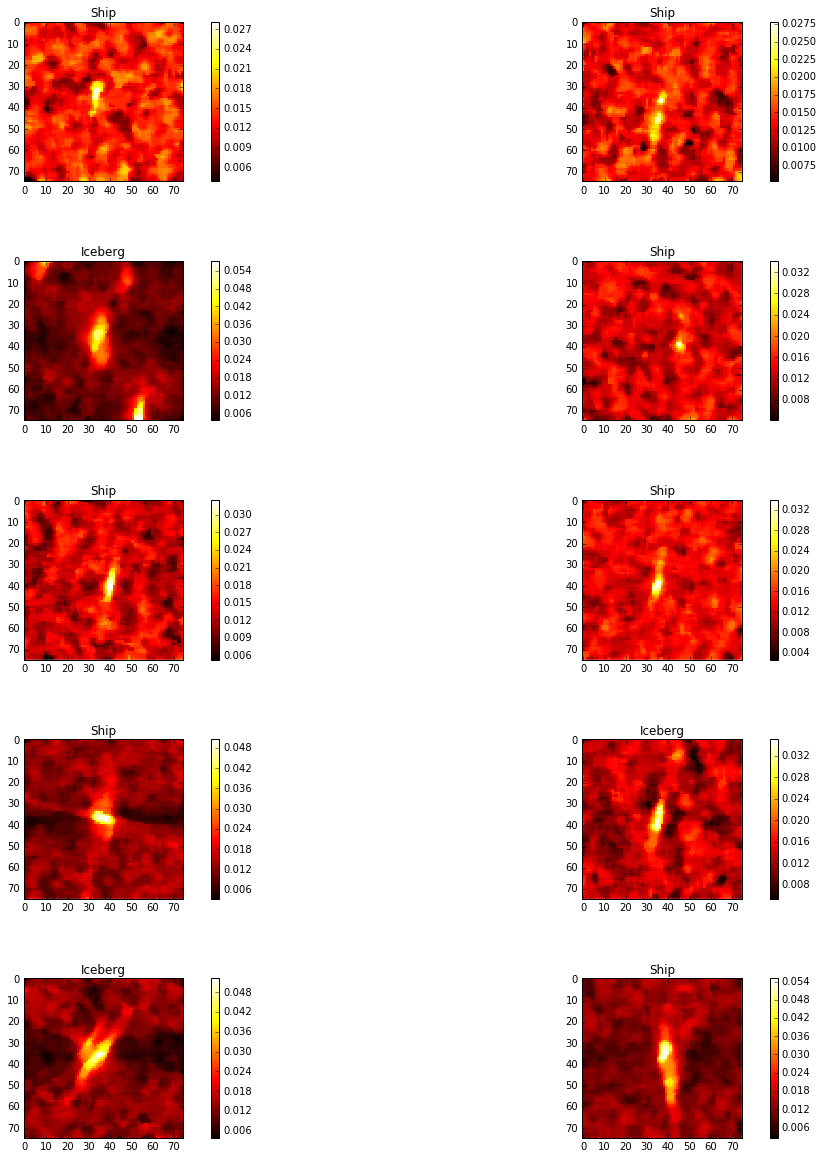

In [40]:
import matplotlib 
%matplotlib inline
import matplotlib.pyplot as plt
import random

#Randomly generate 10 unique numbers from the range of 0-1604
random_int = random.sample(range(0,1604),10)
object_class = np.array(ice.iloc[random_int,4])
class_label=[]
for i in range(len(object_class)):
    if object_class[i] == 0:
        class_label.append("Ship")
    else:
        class_label.append("Iceberg")
i=0
fig = plt.figure(figsize=(20,20))
fig.subplots_adjust(hspace = 0.5, wspace=.001)

for image in random_int:
    ax = fig.add_subplot(5,2,i+1)
    im = plt.imshow(median3[image], cmap='hot', interpolation='none')
    ax.imshow(median3[image], cmap='hot', interpolation='none')
    plt.title(class_label[i])
    i+=1
    cbar = plt.colorbar(im)
plt.savefig("Median")

In [41]:
median_test1=[]
median_test2=[]
median_test3=[]
for i in range(8424):
    median_test3.append(cv2.medianBlur(test_new_band[i],5))
    median_test2.append(cv2.medianBlur(test_band2[i],5))
    median_test1.append(cv2.medianBlur(test_band1[i],5))
median_test3

[array([[ 0.14864473,  0.14055142,  0.09066408, ...,  0.11114859,
          0.11114859,  0.13654424],
        [ 0.14864473,  0.14864473,  0.12632653, ...,  0.11114859,
          0.10936234,  0.11220226],
        [ 0.14864473,  0.12632653,  0.11020816, ...,  0.10936234,
          0.10936234,  0.12420177],
        ..., 
        [ 0.1179956 ,  0.1179956 ,  0.11482986, ...,  0.11005289,
          0.10875805,  0.10875805],
        [ 0.12439558,  0.12439558,  0.12649241, ...,  0.09602901,
          0.10875805,  0.10875805],
        [ 0.12439558,  0.12439558,  0.12782033, ...,  0.08505475,
          0.08505475,  0.08505475]], dtype=float32),
 array([[ 0.07996126,  0.07996126,  0.07996126, ...,  0.11286518,
          0.12042166,  0.10675211],
        [ 0.07996126,  0.07996126,  0.09961992, ...,  0.12042166,
          0.12590796,  0.11790256],
        [ 0.09140714,  0.09140714,  0.08828168, ...,  0.11790256,
          0.12042166,  0.12042166],
        ..., 
        [ 0.14816152,  0.1478643 ,  0

In [42]:
median3 = np.array(median3)
median3 = median3.reshape(median3.shape[0],75,75,1)
median3.shape


(1604, 75, 75, 1)

In [43]:
median_test3 = np.array(median_test3)
median_test3 = median_test3.reshape(median_test3.shape[0],75,75,1)
median_test3.shape

(8424, 75, 75, 1)

In [44]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils
from keras import backend as K
from keras.utils import plot_model
import pydot
K.set_image_dim_ordering('tf')

np.random.seed(1000)
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(75,75,1),padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,( 3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,( 3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(GlobalMaxPooling2D())
#model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.fit(median3[:802],np_utils.to_categorical(ice.iloc[:802,4]),validation_data=(median3[802:],np_utils.to_categorical(ice.iloc[802:,4])), 
          batch_size=32, nb_epoch=500, verbose=1,shuffle = True)
plot_model(model, to_file='model.png')


Train on 802 samples, validate on 802 samples
Epoch 1/500
802/802 [==============================] - 10s - loss: 0.6948 - acc: 0.4838 - val_loss: 0.6913 - val_acc: 0.5698
Epoch 2/500
802/802 [==============================] - 8s - loss: 0.6933 - acc: 0.4975 - val_loss: 0.6945 - val_acc: 0.4302
Epoch 3/500
802/802 [==============================] - 7s - loss: 0.6931 - acc: 0.4925 - val_loss: 0.6927 - val_acc: 0.5611
Epoch 4/500
802/802 [==============================] - 8s - loss: 0.6903 - acc: 0.5474 - val_loss: 0.6838 - val_acc: 0.5698
Epoch 5/500
802/802 [==============================] - 8s - loss: 0.6891 - acc: 0.5748 - val_loss: 0.6845 - val_acc: 0.6185
Epoch 6/500
802/802 [==============================] - 6s - loss: 0.6787 - acc: 0.6122 - val_loss: 0.6620 - val_acc: 0.6309
Epoch 7/500
802/802 [==============================] - 7s - loss: 0.6446 - acc: 0.6596 - val_loss: 0.6130 - val_acc: 0.6434
Epoch 8/500
802/802 [==============================] - 8s - loss: 0.6173 - acc: 0.655

802/802 [==============================] - 7s - loss: 0.3378 - acc: 0.8441 - val_loss: 0.3963 - val_acc: 0.8130
Epoch 67/500
802/802 [==============================] - 8s - loss: 0.3063 - acc: 0.8641 - val_loss: 0.4026 - val_acc: 0.8105
Epoch 68/500
802/802 [==============================] - 8s - loss: 0.3598 - acc: 0.8192 - val_loss: 0.4424 - val_acc: 0.7756
Epoch 69/500
802/802 [==============================] - 8s - loss: 0.3228 - acc: 0.8379 - val_loss: 0.3526 - val_acc: 0.8342
Epoch 70/500
802/802 [==============================] - 8s - loss: 0.3066 - acc: 0.8703 - val_loss: 0.3746 - val_acc: 0.81550.86
Epoch 71/500
802/802 [==============================] - 8s - loss: 0.3020 - acc: 0.8703 - val_loss: 0.3467 - val_acc: 0.8379
Epoch 72/500
802/802 [==============================] - 9s - loss: 0.3269 - acc: 0.8616 - val_loss: 0.3404 - val_acc: 0.8329
Epoch 73/500
802/802 [==============================] - 9s - loss: 0.3729 - acc: 0.8229 - val_loss: 0.5953 - val_acc: 0.6908
Epoch 74/

802/802 [==============================] - 8s - loss: 0.2304 - acc: 0.8803 - val_loss: 0.3479 - val_acc: 0.8441
Epoch 132/500
802/802 [==============================] - 8s - loss: 0.2369 - acc: 0.8840 - val_loss: 0.3724 - val_acc: 0.8479
Epoch 133/500
802/802 [==============================] - 6s - loss: 0.1888 - acc: 0.9239 - val_loss: 0.3496 - val_acc: 0.8429
Epoch 134/500
802/802 [==============================] - 8s - loss: 0.1913 - acc: 0.9202 - val_loss: 0.4088 - val_acc: 0.8217
Epoch 135/500
802/802 [==============================] - 7s - loss: 0.1992 - acc: 0.9065 - val_loss: 0.4167 - val_acc: 0.8180
Epoch 136/500
802/802 [==============================] - 8s - loss: 0.1784 - acc: 0.9214 - val_loss: 0.3768 - val_acc: 0.8466
Epoch 137/500
802/802 [==============================] - 7s - loss: 0.1937 - acc: 0.9065 - val_loss: 0.4741 - val_acc: 0.8117
Epoch 138/500
802/802 [==============================] - 8s - loss: 0.1806 - acc: 0.9264 - val_loss: 0.3755 - val_acc: 0.8441
Epoch 

802/802 [==============================] - 7s - loss: 0.1080 - acc: 0.9539 - val_loss: 0.4560 - val_acc: 0.8317
Epoch 197/500
802/802 [==============================] - 8s - loss: 0.1155 - acc: 0.9551 - val_loss: 0.5256 - val_acc: 0.8204
Epoch 198/500
802/802 [==============================] - 9s - loss: 0.1032 - acc: 0.9638 - val_loss: 0.4825 - val_acc: 0.8329
Epoch 199/500
802/802 [==============================] - 9s - loss: 0.1104 - acc: 0.9526 - val_loss: 0.5446 - val_acc: 0.8167
Epoch 200/500
802/802 [==============================] - 8s - loss: 0.1191 - acc: 0.9576 - val_loss: 0.4911 - val_acc: 0.8404
Epoch 201/500
802/802 [==============================] - 9s - loss: 0.0991 - acc: 0.9626 - val_loss: 0.4903 - val_acc: 0.8292
Epoch 202/500
802/802 [==============================] - 9s - loss: 0.0930 - acc: 0.9651 - val_loss: 0.5784 - val_acc: 0.8142
Epoch 203/500
802/802 [==============================] - 8s - loss: 0.1125 - acc: 0.9589 - val_loss: 0.5100 - val_acc: 0.8242
Epoch 

802/802 [==============================] - 9s - loss: 0.0477 - acc: 0.9875 - val_loss: 0.7648 - val_acc: 0.8192
Epoch 262/500
802/802 [==============================] - 6s - loss: 0.0612 - acc: 0.9688 - val_loss: 0.6099 - val_acc: 0.8292
Epoch 263/500
802/802 [==============================] - 8s - loss: 0.0366 - acc: 0.9888 - val_loss: 0.6918 - val_acc: 0.8242
Epoch 264/500
802/802 [==============================] - 8s - loss: 0.0502 - acc: 0.9800 - val_loss: 0.7833 - val_acc: 0.8155
Epoch 265/500
802/802 [==============================] - 8s - loss: 0.0849 - acc: 0.9651 - val_loss: 0.6159 - val_acc: 0.8267
Epoch 266/500
802/802 [==============================] - 8s - loss: 0.0479 - acc: 0.9825 - val_loss: 0.6098 - val_acc: 0.8317
Epoch 267/500
802/802 [==============================] - 8s - loss: 0.0396 - acc: 0.9925 - val_loss: 0.6864 - val_acc: 0.8242
Epoch 268/500
802/802 [==============================] - 8s - loss: 0.0585 - acc: 0.9788 - val_loss: 0.7178 - val_acc: 0.8229
Epoch 

802/802 [==============================] - 8s - loss: 0.0324 - acc: 0.9875 - val_loss: 0.7496 - val_acc: 0.8379
Epoch 326/500
802/802 [==============================] - 9s - loss: 0.0161 - acc: 0.9975 - val_loss: 0.7453 - val_acc: 0.8466
Epoch 327/500
802/802 [==============================] - 7s - loss: 0.0202 - acc: 0.9963 - val_loss: 0.8584 - val_acc: 0.8217
Epoch 328/500
802/802 [==============================] - 8s - loss: 0.0141 - acc: 0.9988 - val_loss: 0.8756 - val_acc: 0.8267
Epoch 329/500
802/802 [==============================] - 8s - loss: 0.0124 - acc: 1.0000 - val_loss: 0.8316 - val_acc: 0.8342
Epoch 330/500
802/802 [==============================] - 8s - loss: 0.0090 - acc: 1.0000 - val_loss: 0.8513 - val_acc: 0.8342
Epoch 331/500
802/802 [==============================] - 8s - loss: 0.0105 - acc: 0.9988 - val_loss: 0.9088 - val_acc: 0.8292
Epoch 332/500
802/802 [==============================] - 9s - loss: 0.0113 - acc: 0.9975 - val_loss: 0.8841 - val_acc: 0.8242
Epoch 

KeyboardInterrupt: 

In [62]:
final_prediction = model.predict_proba(vertical_stack_test,verbose=1)


8424/8424 [==============================] - 72s    


In [63]:
result=pd.read_csv('sample_iceberg.csv')
predi = pd.DataFrame(final_prediction)
nresult=pd.DataFrame()
nresult['id'] = test['id']
nresult['is_iceberg'] = predi.iloc[:,1]
nresult.to_csv('result.csv', index=False)
""""predi.columns=['0','is_iceberg']
result.iloc[:,1] = predi.iloc[:,1]
print(result)"""

'"predi.columns=[\'0\',\'is_iceberg\']\nresult.iloc[:,1] = predi.iloc[:,1]\nprint(result)'